# Lecture 5

In [ ]:
%run set_env.py
%matplotlib inline

### Universal Functions (UFuncs)

A <font color="green"><b>universal function (ufunc)</b></font> is:
* a function which operates on an ndarray object in an <font color="green"><b>element-by-element</b></font> fashion
* an instance of the numpy.ufunc class
* a function of which many are implemented in compiled C code
* to which broadcasting rules are applied. 

The concept is similar to the <a href="https://docs.python.org/3/library/functions.html#map">map function</a> in standard Python.

#### Some ufuncs within NumPy: 

* Math operations:
  * add(x1,x2)   (called when invoked a+b)
  * power(x1,x2) (same as '**')
  * mod(x1,x2)
  * exp(x)
  * sqrt(x)
  * log(x)  (Napierian/natural logarithm)
  * ...
* Trig operations:
  * sin(x)
  * sinh(x)
  * arcsinh(x)
  * deg2rad(x)
  * rad2deg(x)
  * ..
* Bit-twiddling operations:
  * bitwise_and(x1,x2)
  * ...
* Comparison functions:
  * greater(x1,x2) (called when x1>x2 is invoked)
  * not_equal(x1,x2) (called when x1!=x2 is invoked)
  * maximum(x1,x2)  (el.-wise max.)
  * isfinite(x)   (el. test for finiteness i.e. neither Infinity nor Not a Number)
  * isinf(x)
  * isnan(x)
  * ...
  
To see all the available ufuncs, see:<br>  
https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#available-ufuncs

<font color="blue"><b>Note:</b></font>
* One can write its own UFunc -> C-API

#### Examples/Applications of UFuncs:

In [ ]:
# Example 1: no BC
np.set_printoptions(precision=5)
import numpy as np
x = np.random.random((2,3,7))
y = np.exp(x)
print(" x:\n{0}\n".format(x))
print(" y:\n{0}\n".format(y))

In [ ]:
# Example 2: with BC
x=np.arange(90,103,dtype=int)
y=np.arange(2,7,dtype=int).reshape((5,1))
print("  x:{0}\n{1}\n".format(x.shape,x))
print("  y:{0}\n{1}\n".format(y.shape,y))
z=np.mod(x,y)
print("  z:{0}\n{1}\n".format(z.shape,z))

### Reductions on ndarrays

* Besides Numpy functions which operate on ndarrays <font color="green"><b>element-wise</b></font> (UFuncs, vide supra),<br>
  there are also Numpy functions which perform <font color="green"><b>reductions</b></font> on ndarrays. 

* By <font color="green"><b>default</b></font>, the reductions operate on the <font color="green"><b>whole</b></font> ndarray.
  
* However, we can specify a particular <font color="green"><b>axis/dimension</b></font> on which to perform the reduction.  

* The functions all have a similar syntax:<br>
  numpy.func_name(a,[axis=None],[dtype=None],[out=None])<br>
  The function <font color="green"><b>func_name</b></font> can be called in 2 different ways:
  * a.func_name()    # <font color="blue"><b>Object-Oriented way</b></font> i.e. method associated to an object
  * np.func_name(a)  # <font color="blue"><b>Procedural way</b></font> i.e. array is an argument of the function

#### Mathematical Operations:
* numpy.sum(), numpy.cumsum()    : sum vs. cumulative sum
* numpy.prod(), numpy.cumprod()  : prod vs. cumulative product
* numpy.min(), numpy.max()       : min, max of a vector
* numpy.argmin(), numpy.argmax() : return indices of the min./max. values

#### Statistical Operations:
* numpy.mean, numpy.median : average, median
* numpy.std, numpy.var     : standard deviation, variance

#### Logical Operations:
* numpy.any(): Test whether ANY el. along a given axis evaluates to True
* numpy.all(): Test whether ALL el. along a given axis evaluate to True

#### Examples

###### Example 1:

In [ ]:
# Example 1: 
# Invoke sum over the complete ndarray
a = np.arange(1,25).reshape((2,3,4))
print("  a:\n{0}\n".format(a))
print("  a.shape:{0}\n".format(a.shape))
print("  a.sum() (Object-oriented syntax):\n{0}\n".format(a.sum()))
print("  np.sum(a) (Procedural syntax)  :\n{0}\n".format(np.sum(a)))

In [ ]:
# Invoke sums over certain axes
a = np.arange(1,25).reshape((2,3,4))
red0 = a.sum(axis=0)
print("   a.sum(axis=0)   shape:{0}:\n{1}\n".format(red0.shape, red0))
red1 = a.sum(axis=1)
print("   a.sum(axis=1)   shape:{0}:\n{1}\n".format(red1.shape, red1))
red2 = a.sum(axis=2)
print("   a.sum(axis=2)   shape:{0}:\n{1}\n".format(red2.shape, red2))

###### Example 2:

In [ ]:
np.set_printoptions(precision=4)
b = rnd.random((3,7))
print("  b:\n{0}\n".format(b))
print("  b.shape:{0}\n".format(b.shape))

av = b.mean(axis=0)
print("  b.mean(axis=0):\n{0}\n".format(av))

bool_matrix = b < 0.01
print("  bool_matrix:\n{0}\n".format(bool_matrix))
print("  Are they any values < 0.01? {0}".format(bool_matrix.any()))

### Exercises:

* Generate the following vector [ 1, 3, 9, 27, ... , 729] using a UFunc.
 
* Generate a 5x10 array A with random numbers $x$ $\in$ $[0,1[$.
  * What is the maximum value for all $x$ in A?
  * What is the minimum value in each column?
  * What is the minimum value in the fourth row?
  * Are there any random numbers $x<\alpha$ or $x>\beta$?<br>You can set $\alpha:=0.02$ and $\beta:=0.98$
  
* Write the function *calc_sn(n)* (<font color="red">**without the use of for loops!**</font>): 
  * The function *calc_sn(n)* returns an array of partial sums $S_n$ ($n>0$) given by:<br>
    $\begin{equation*}
      S_n := \sum_{k=1}^{k=n} \frac{sin(k)}{k^2} 
      \end{equation*}
    $ 
  * Generate the plot $S_n$ where $n$ $\in$ $\{1,\ldots,100\}$ to visualize the absolute convergency of the series.    

  

### Solutions:

Exercise 5::
  5.1:
  x:
[1 2 3 4 5 6]

    Solution 1:
  y:
[  3   9  27  81 243 729]

    Solution 2:
  y:
[  3   9  27  81 243 729]

  5.2:
  A:
[[0.36009 0.89584 0.85177 0.8146  0.5502  0.54849 0.55927 0.41284 0.95351
  0.65556]
 [0.50098 0.55771 0.54587 0.89204 0.98126 0.13402 0.2357  0.07755 0.72112
  0.23926]
 [0.35472 0.96616 0.00585 0.85005 0.45349 0.51279 0.24053 0.34668 0.22611
  0.67653]
 [0.04231 0.2799  0.74452 0.50974 0.99939 0.03197 0.27216 0.33741 0.8992
  0.03639]
 [0.01097 0.73211 0.08553 0.873   0.87287 0.61701 0.74351 0.9248  0.15424
  0.24051]]

  Max val for all of A:
0.9993929425345801

  Min. val in each column:
[0.01097 0.2799  0.00585 0.50974 0.45349 0.03197 0.2357  0.07755 0.15424
 0.03639]

  Min. val in fourth row:
0.03196846621842875

  Boolean Matrix:
[[False False False False False False False False False False]
 [False False False False  True False False False False False]
 [False False  True False False False False False False False]
 [False False Fal

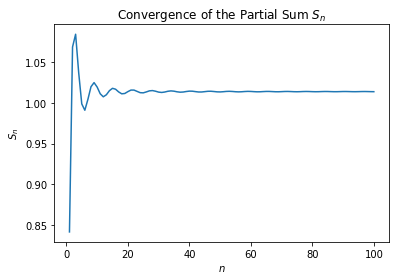

In [3]:
# %load ../solutions/ex5.py
import math
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)


print("Exercise 5::")
print("  5.1:")
x = np.arange(1,7)
print("  x:\n{0}\n".format(x))
print("    Solution 1:")
y = np.power(3,x)
print("  y:\n{0}\n".format(y))

print("    Solution 2:")
y = 3**x
print("  y:\n{0}\n".format(y))


print("  5.2:")
A = rnd.random((5,10))
print("  A:\n{0}\n".format(A)) 

max_val = A.max()
print("  Max val for all of A:\n{0}\n".format(max_val))

min_val_eachcol = A.min(axis=0) 
print("  Min. val in each column:\n{0}\n".format(min_val_eachcol))

min_val_fourthrow = A[3,:].min()
print("  Min. val in fourth row:\n{0}\n".format(min_val_fourthrow))

bool_mat = (A < 0.02) | (A > 0.98)
print("  Boolean Matrix:\n{0}\n".format(bool_mat))
print("  Any val <0.02 or >0.98? {0}\n".format(bool_mat.any()))
print("  Corresponding values:\n{0}\n".format(A[bool_mat]))


print("  5.3:")
def calc_sn(n):
    """
    Function which returns an array of 
    partial sums 
    """
    k = np.arange(1,n+1)
    nom = np.sin(k)
    denom = k**2
    return np.cumsum(nom/denom)

N = 100
k = np.arange(1,N+1)
Sk = calc_sn(N)
plt.xlabel("$n$")
plt.ylabel("$S_n$")
plt.title("Convergence of the Partial Sum $S_n$")
plt.plot(k,Sk);
